# Assignment-12-Naive Bayes

**1) Prepare a classification model using Naive Bayes for salary data** 

Data Description:

age -- age of a person\
workclass	-- A work class is a grouping of work \
education	-- Education of an individuals	\
maritalstatus -- Marital status of an individulas	\
occupation	 -- occupation of an individuals\
relationship -- 	\
race --  Race of an Individual\
sex --  Gender of an Individual\
capitalgain --  profit received from the sale of an investment	\
capitalloss	-- A decrease in the value of a capital asset\
hoursperweek -- number of hours work per week	\
native -- Native of an individual\
Salary -- salary of an individual\


In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, RobustScaler, MaxAbsScaler
#!pip install category_encoders
import category_encoders as ce
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load datasets
train = pd.read_csv('dataset/SalaryData_Train.csv')
test = pd.read_csv('dataset/SalaryData_Test.csv')

In [3]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
# train.drop(['education'], axis=1, inplace=True)
# test.drop(['education'],axis=1, inplace=True)

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
capitalloss,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
hoursperweek,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [8]:
# list cateogrical columns
categorical = [col for col in train.columns if train[col].dtype == 'object']
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [9]:
train[categorical].sample(10)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
3266,Private,Bachelors,Never-married,Adm-clerical,Not-in-family,Asian-Pac-Islander,Male,United-States,<=50K
2351,Private,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States,<=50K
6699,Private,10th,Separated,Sales,Unmarried,White,Female,United-States,<=50K
12751,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,United-States,<=50K
17060,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,Female,United-States,<=50K
5728,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,Black,Female,United-States,<=50K
16700,Private,Bachelors,Never-married,Transport-moving,Own-child,White,Male,United-States,<=50K
21318,Private,Assoc-voc,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
11355,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States,>50K
20126,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K


In [10]:
#check for missing values in training data
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
# frequency counts
for cat in categorical:
    print(train[cat].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [12]:
#check cardinality in categorical variables
for cat in categorical:
    print(cat, 'contains -', len(train[cat].unique()), 'labels')

workclass contains - 7 labels
education contains - 16 labels
maritalstatus contains - 7 labels
occupation contains - 14 labels
relationship contains - 6 labels
race contains - 5 labels
sex contains - 2 labels
native contains - 40 labels
Salary contains - 2 labels


In [13]:
# check numerical columns
numerical = [num for num in train.columns if train[num].dtype!='object']
print(len(numerical))
print(numerical)

5
['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [14]:
train[numerical].sample(10)

,age,educationno,capitalgain,capitalloss,hoursperweek
9896,37,9,0,0,40
2736,37,14,0,0,40
19905,40,10,0,0,45
11799,28,8,0,0,40
22436,19,10,0,0,30
12145,35,10,0,0,40
24487,45,10,0,0,84
10635,39,10,0,0,40
23766,22,9,0,0,54
3297,61,9,22040,0,40


In [15]:
train[numerical].isna().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [16]:
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [17]:
#One Hot Encoding using category_encoders
# ohe = ce.OneHotEncoder(cols=['race',
#                              'sex',])
# x_train = ohe.fit_transform(x_train)
# x_test = ohe.fit_transform(x_test)

In [18]:
#Dummy Encoding using pandas.get_dummies
# x_train = pd.get_dummies(x_train)
# x_test = pd.get_dummies(x_test)

In [19]:
# #Hash Encoding Categorical Data
# from category_encoders.hashing import HashingEncoder
# he = HashingEncoder(cols=['occupation', 'native'])
# x_train = he.fit_transform(x_train)
# x_test = he.fit_transform(x_test)

In [20]:
#Binary Encoding Categorical Data for categorical column
be = ce.BinaryEncoder(cols=['race', 'sex'])
x_train = be.fit_transform(x_train)
x_test = be.fit_transform(x_test)

/home/starlord/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/starlord/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [21]:
#BaseN Encoding Categorical Data for categorical column
bne = ce.BaseNEncoder(cols=['workclass',
                             'maritalstatus',
                             'relationship',
                            'occupation',
                            'education',
                            'native'],base=5)
x_train = bne.fit_transform(x_train)
x_test = bne.fit_transform(x_test)

/home/starlord/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/starlord/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [22]:
x_train

,age,workclass_0,workclass_1,workclass_2,education_0,education_1,education_2,educationno,maritalstatus_0,maritalstatus_1,...,race_3,sex_0,sex_1,capitalgain,capitalloss,hoursperweek,native_0,native_1,native_2,native_3
0,39,0,0,1,0,0,1,13,0,0,...,1,0,1,2174,0,40,0,0,0,1
1,50,0,0,2,0,0,1,13,0,0,...,1,0,1,0,0,13,0,0,0,1
2,38,0,0,3,0,0,2,9,0,0,...,1,0,1,0,0,40,0,0,0,1
3,53,0,0,3,0,0,3,7,0,0,...,0,0,1,0,0,40,0,0,0,1
4,28,0,0,3,0,0,1,13,0,0,...,0,1,0,0,0,40,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,0,0,3,0,1,2,12,0,0,...,1,1,0,0,0,38,0,0,0,1
30157,40,0,0,3,0,0,2,9,0,0,...,1,0,1,0,0,40,0,0,0,1
30158,58,0,0,3,0,0,2,9,0,1,...,1,1,0,0,0,40,0,0,0,1
30159,22,0,0,3,0,0,2,9,0,0,...,1,0,1,0,0,20,0,0,0,1


In [23]:
print(x_train.info())
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              30161 non-null  int64
 1   workclass_0      30161 non-null  int64
 2   workclass_1      30161 non-null  int64
 3   workclass_2      30161 non-null  int64
 4   education_0      30161 non-null  int64
 5   education_1      30161 non-null  int64
 6   education_2      30161 non-null  int64
 7   educationno      30161 non-null  int64
 8   maritalstatus_0  30161 non-null  int64
 9   maritalstatus_1  30161 non-null  int64
 10  maritalstatus_2  30161 non-null  int64
 11  occupation_0     30161 non-null  int64
 12  occupation_1     30161 non-null  int64
 13  occupation_2     30161 non-null  int64
 14  relationship_0   30161 non-null  int64
 15  relationship_1   30161 non-null  int64
 16  relationship_2   30161 non-null  int64
 17  race_0           30161 non-null  int64
 18  race_1

In [24]:
x_train_cols = x_train.columns
x_test_cols = x_test.columns

In [25]:
# def label_encode(dataset,columns):
#     for col in columns:
#         dataset[col] = LabelEncoder().fit_transform(dataset[col])
#     return dataset

#label encoding target column
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [26]:
# scaling data using standard scaler
# x_train = StandardScaler().fit_transform(x_train)
# x_train = pd.DataFrame(x_train, columns=x_train_cols)
# x_test = StandardScaler().fit_transform(x_test)
# x_test = pd.DataFrame(x_test, columns=x_test_cols)

In [27]:
#scaling data using MaxAbsScaler
x_train_max = MaxAbsScaler().fit_transform(x_train)
x_train_max = pd.DataFrame(x_train, columns=x_train_cols)
x_test_max = MaxAbsScaler().fit_transform(x_test)
x_test_max = pd.DataFrame(x_test, columns=x_test_cols)

In [28]:
#scaling data using RobustScaler
x_train_rob = RobustScaler().fit_transform(x_train)
x_train_rob = pd.DataFrame(x_train, columns=x_train_cols)
x_test_rob = RobustScaler().fit_transform(x_test)
x_test_rob = pd.DataFrame(x_test, columns=x_test_cols)

In [29]:
x_train_max.head()

,age,workclass_0,workclass_1,workclass_2,education_0,education_1,education_2,educationno,maritalstatus_0,maritalstatus_1,...,race_3,sex_0,sex_1,capitalgain,capitalloss,hoursperweek,native_0,native_1,native_2,native_3
0,39,0,0,1,0,0,1,13,0,0,...,1,0,1,2174,0,40,0,0,0,1
1,50,0,0,2,0,0,1,13,0,0,...,1,0,1,0,0,13,0,0,0,1
2,38,0,0,3,0,0,2,9,0,0,...,1,0,1,0,0,40,0,0,0,1
3,53,0,0,3,0,0,3,7,0,0,...,0,0,1,0,0,40,0,0,0,1
4,28,0,0,3,0,0,1,13,0,0,...,0,1,0,0,0,40,0,0,0,2


In [30]:
x_test_max.head()

,age,workclass_0,workclass_1,workclass_2,education_0,education_1,education_2,educationno,maritalstatus_0,maritalstatus_1,...,race_3,sex_0,sex_1,capitalgain,capitalloss,hoursperweek,native_0,native_1,native_2,native_3
0,25,0,0,1,0,0,1,7,0,0,...,1,0,1,0,0,40,0,0,0,1
1,38,0,0,1,0,0,2,9,0,0,...,0,0,1,0,0,50,0,0,0,1
2,28,0,0,2,0,0,3,12,0,0,...,0,0,1,0,0,40,0,0,0,1
3,44,0,0,1,0,0,4,10,0,0,...,1,0,1,7688,0,40,0,0,0,1
4,34,0,0,1,0,1,0,6,0,0,...,0,0,1,0,0,30,0,0,0,1


In [31]:
#instatiate model
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
cnb = ComplementNB()
ctnb = CategoricalNB()

In [32]:
#fit model
gnb.fit(x_train_max, y_train)
mnb.fit(x_train_max, y_train)
bnb.fit(x_train_max, y_train)
cnb.fit(x_train_max, y_train)
ctnb.fit(x_train_max, y_train)

CategoricalNB()

In [33]:
#Compare the train-set and test-set accuracy
#predict test set
gnb_y_pred = gnb.predict(x_test_max)
mnb_y_pred = mnb.predict(x_test_max)
bnb_y_pred = gnb.predict(x_test_max)
cnb_y_pred = mnb.predict(x_test_max)
ctnb_y_pred = mnb.predict(x_test_max)


#predict train set
gnb_y_pred_train = gnb.predict(x_train_max)
mnb_y_pred_train = gnb.predict(x_train_max)
bnb_y_pred_train = gnb.predict(x_train_max)
cnb_y_pred_train = gnb.predict(x_train_max)
ctnb_y_pred_train = gnb.predict(x_train_max)

In [34]:
print('Guassian NB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, gnb_y_pred)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, gnb_y_pred_train)))
print('#########################')
print('MultinomialNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, mnb_y_pred)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, mnb_y_pred_train)))
print('#########################')
print('Bernoulli NB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, bnb_y_pred)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, bnb_y_pred_train)))
print('#########################')
print('ComplementNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, cnb_y_pred)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, cnb_y_pred_train)))
print('#########################')
print('Categorical Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, cnb_y_pred)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, cnb_y_pred_train)))

Guassian NB Model accuracy score: 0.7989
Training-set accuracy score: 0.8150
#########################
MultinomialNB Model accuracy score: 0.7750
Training-set accuracy score: 0.8150
#########################
Bernoulli NB Model accuracy score: 0.7989
Training-set accuracy score: 0.8150
#########################
ComplementNB Model accuracy score: 0.7750
Training-set accuracy score: 0.8150
#########################
Categorical Model accuracy score: 0.7750
Training-set accuracy score: 0.8150


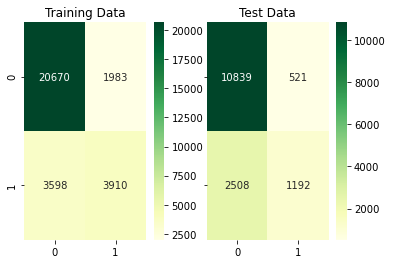

In [35]:
#Plotting confusion matrix for Guassian NB
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((confusion_matrix(y_train,gnb_y_pred_train)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,gnb_y_pred)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [36]:
# classification report for Guassian NB
print(classification_report(y_test,gnb_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     11360
           1       0.70      0.32      0.44      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.64      0.66     15060
weighted avg       0.78      0.80      0.77     15060



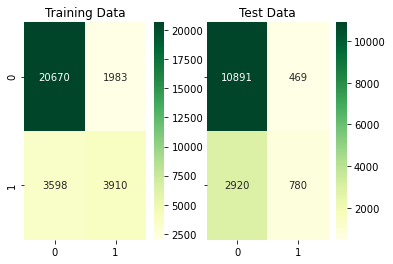

In [37]:
#Plotting confusion matrix for MultinomialNB
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((confusion_matrix(y_train,mnb_y_pred_train)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,mnb_y_pred)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [38]:
# classification report for MultinomialNB
print(classification_report(y_test,mnb_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



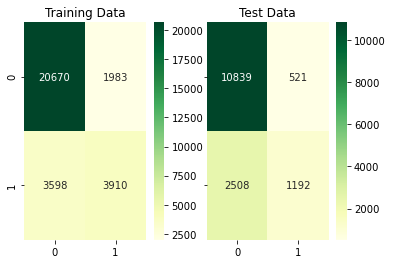

In [39]:
#Plotting confusion matrix for Bernoulli NB
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((confusion_matrix(y_train,bnb_y_pred_train)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,bnb_y_pred)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [40]:
# classification report for Bernoulli NB
print(classification_report(y_test,bnb_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     11360
           1       0.70      0.32      0.44      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.64      0.66     15060
weighted avg       0.78      0.80      0.77     15060



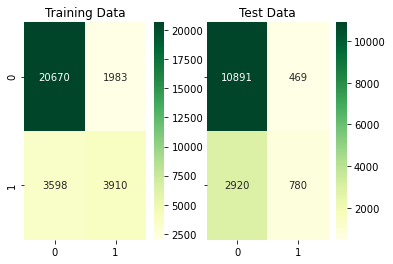

In [41]:
#Plotting confusion matrix for ComplementNB
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((confusion_matrix(y_train,cnb_y_pred_train)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,cnb_y_pred)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [42]:
# classification report for Complement NB
print(classification_report(y_test,cnb_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



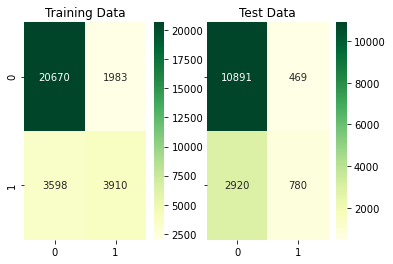

In [43]:
#Plotting confusion matrix for Categorical NB
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((confusion_matrix(y_train,ctnb_y_pred_train)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,ctnb_y_pred)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [44]:
# classification report for Categorical NB
print(classification_report(y_test,ctnb_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



### Hyperparameter Tuning Gaussian NB

In [45]:
model = GaussianNB()
cv_scores = cross_val_score(model, x_train_rob, y_train, cv=10)
    
print(model, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

GaussianNB()  mean accuracy:  81.483 % std:  0.003 %


In [46]:
y_pred = model.fit(x_train_rob, y_train).predict(x_test_rob)
print("Number of mislabeled points out of a total %d points : %d" % (x_test_rob.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 15060 points : 3029


In [47]:
predict_train = model.fit(x_train_rob, y_train).predict(x_train_rob)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)


# predict the target on the test dataset
predict_test = model.predict(x_test_rob)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.8149597161897815
accuracy_score on test dataset :  0.798871181938911


In [48]:
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     11360
           1       0.70      0.32      0.44      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.64      0.66     15060
weighted avg       0.78      0.80      0.77     15060



In [49]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2)



In [50]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     n_jobs=-1,
                     scoring='accuracy')

# Data_transformed = PowerTransformer().fit_transform(x_test_rob)

gs_NB.fit(x_test_rob, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   18.9s finished


In [51]:
gs_NB.best_params_

{'var_smoothing': 1e-09}

In [52]:
gs_NB.best_score_

0.8122399291722001

In [53]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

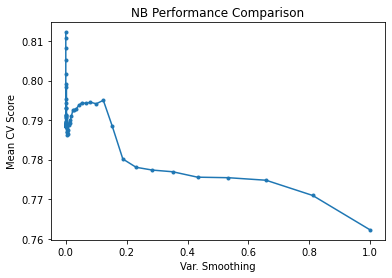

In [54]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [55]:
# predict the target on the test dataset
predict_test = gs_NB.predict(x_test_rob)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8132138114209827


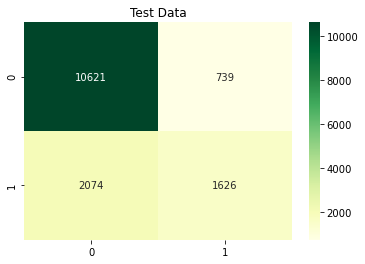

In [56]:
sns.heatmap((confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');